<div style="border-radius: 10px; border: 2px solid #3498db; padding: 15px; background-color: #000; font-size: 120%; text-align: center; color: #3498db; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="margin: 0; font-weight: bold; font-size: 150%; color: #3498db;">Hello!</p>
    <p style="margin: 10px 0 20px; color: #3498db;">Wishing you a day filled with tranquility and positivity!</p>
    <p style="margin: 0; color: #3498db;">Explore the calm and soothing content we have in store for you.</p>
</div>


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Importing Modules and Libraries</p>
</div>


In [1]:
import pandas as pd
import seaborn as sb
import warnings
from matplotlib import cm
c1=cm.get_cmap('hsv')
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import catboost
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer,make_column_selector

/tmp/ipykernel_19/1210205003.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c1=cm.get_cmap('hsv')


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Loading Data</p>
</div>


In [2]:
data=pd.read_csv('/kaggle/input/phone-classification-dataset/train.csv')


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Data Cleaning</p>
</div>


In [3]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Function to get a less correlated features</p>
</div>


In [6]:
def lesscorr(data,target,thres):
  set1=set()
  df=data.corr()
  for i in data.columns:
      if abs(df.loc[i,target]<thres):
        set1.add(i)
  return set1

LC=lesscorr(data,'price_range',0.1)

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Heatmap For less correlated values checking</p>
</div>


Text(0.5, 1.0, 'Less Correlated Values Check')

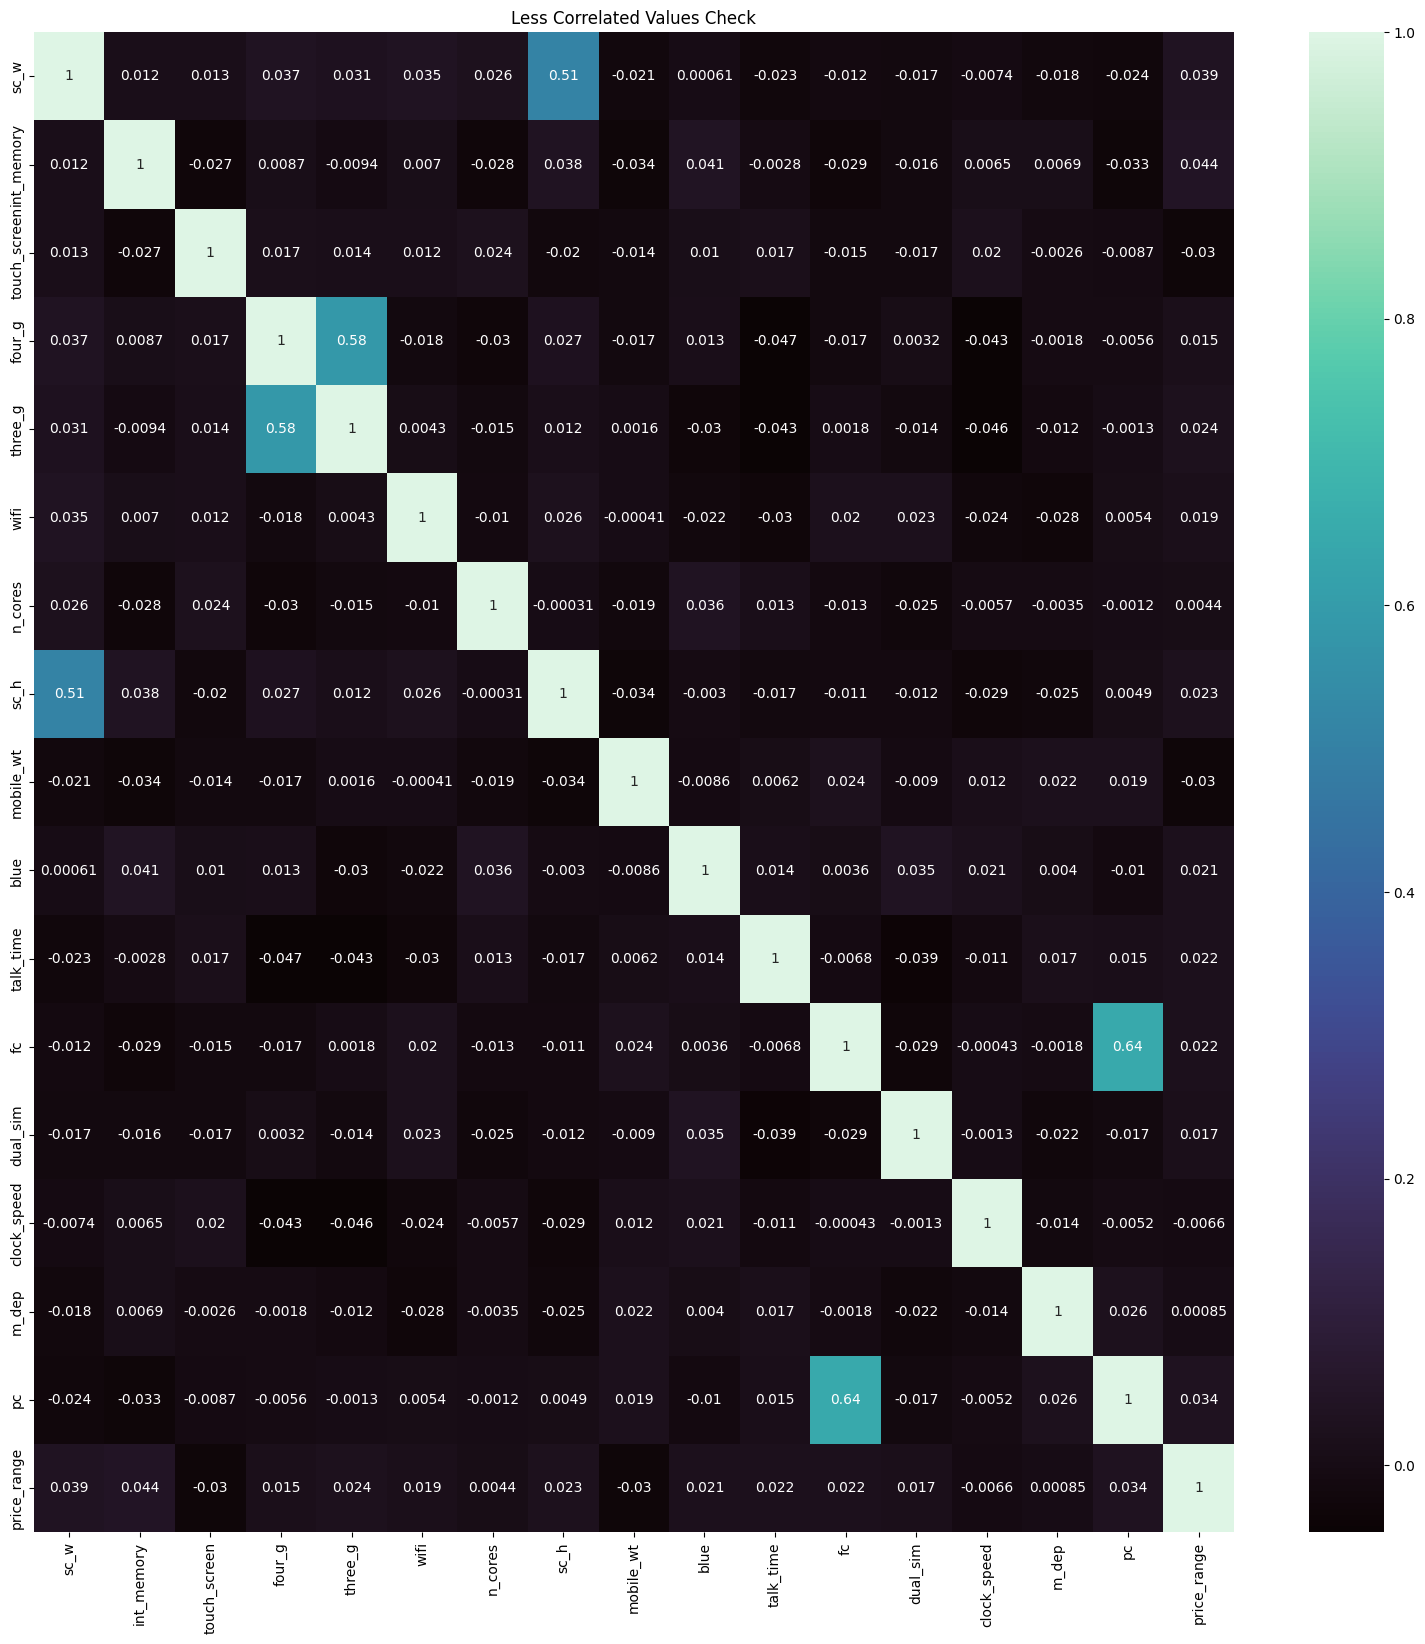

In [7]:
fig=plt.figure(figsize=(15,15))
axes=fig.add_axes([1,1,1,1])
sb.heatmap(data[[i for i in LC]+['price_range']].corr(),cmap='mako',annot=True,ax=axes)
plt.title('Less Correlated Values Check')

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Getting New Data</p>
</div>


In [8]:
newdata=data.drop(LC,axis=1)

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Heatmap For New Data</p>
</div>


Text(0.5, 1.0, 'Price Range Correlation')

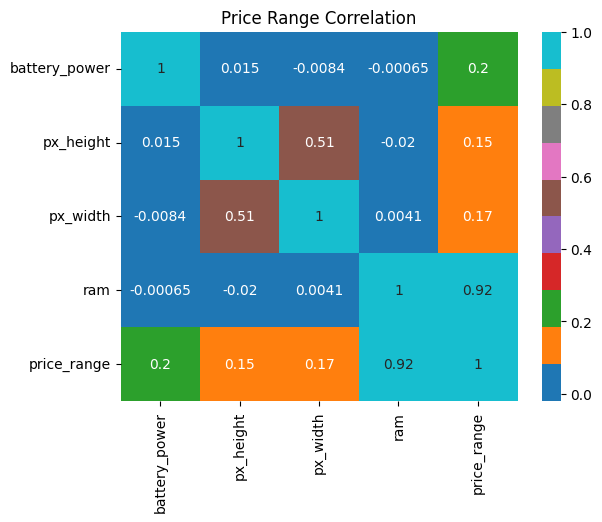

In [9]:
sb.heatmap(newdata.corr(),annot=True,cmap='tab10')
plt.title('Price Range Correlation')

In [10]:
sol=newdata.describe().transpose()

<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Finding Distribution Type</p>
</div>


In [11]:
sol1=sol[['mean','50%']]

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Function For Finding Skewness</p>
</div>


In [12]:
def func(rec):
  a=rec['mean']
  b=rec['50%']
  if a>b:
    return 'RightSkewness'
  else:
    return 'LeftSkewness'

sol1['Skewness Type']=sol1.apply(func,axis=1)

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Distribution Plots</p>
</div>


<Figure size 640x480 with 0 Axes>

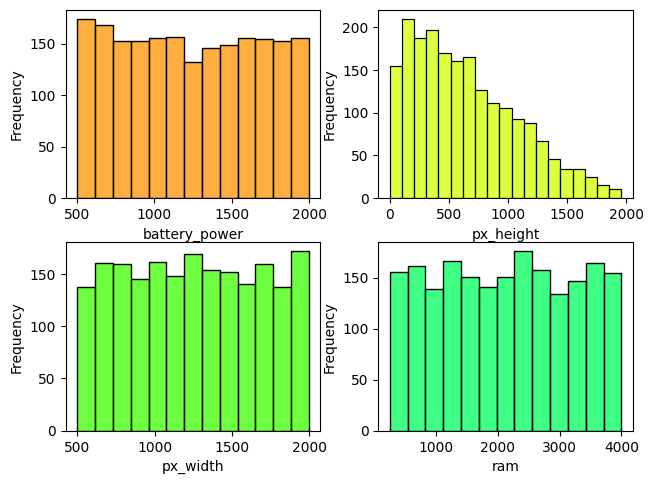

In [13]:
fig=plt.figure()
fig,axes=plt.subplots(2,2)
fig.tight_layout()
ind=sol1.index
count=0
count1=0.1
for i in range(2):
  for j in range(2):
    sb.histplot(data=newdata,x=ind[count],ax=axes[i][j],color=c1(count1))
    axes[i][j].set_ylabel('Frequency')
    count+=1
    count1+=0.1
    if count==4:
      break
  if count==4:
      break
skew=sol1

In [14]:
skew

,mean,50%,Skewness Type
battery_power,1238.5185,1226.0,RightSkewness
px_height,645.1080,564.0,RightSkewness
px_width,1251.5155,1247.0,RightSkewness
ram,2124.2130,2146.5,LeftSkewness
price_range,1.5000,1.5,LeftSkewness


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Machine Learning</p>
</div>


<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Constructing Pipelines for different types of models</p>
</div>


In [15]:
pi1=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model1',RandomForestClassifier())])
pi2=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model2',DecisionTreeClassifier())])
pi3=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model3',BaggingClassifier())])
pi4=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model4',CatBoostClassifier())])
pi5=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model5',LogisticRegression())])
pi6=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model6',SVC())])
pi7=Pipeline(steps=[('Normalise',StandardScaler()),('minmax',MinMaxScaler()),('model7',KNeighborsClassifier())])

In [16]:
y=newdata['price_range']
x=newdata.drop('price_range',axis=1)

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Splitting Data</p>
</div>


In [17]:
xtra,xtest,ytra,ytest=train_test_split(x,y,test_size=0.2)

<div style="border-bottom: 3px solid #3498db; text-align: center; padding: 10px; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2ecc71; font-size: 140%; margin: 0; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7);">Fitting Pipeline</p>
</div>


In [18]:
list1=[pi1,pi2,pi3,pi4,pi5,pi6,pi7]
for i in list1:
  i.fit(xtra,ytra)

Learning rate set to 0.081046
0:	learn: 1.2658811	total: 60.1ms	remaining: 1m
1:	learn: 1.1647463	total: 63.2ms	remaining: 31.5s
2:	learn: 1.0872253	total: 66.7ms	remaining: 22.2s
3:	learn: 1.0100344	total: 69.8ms	remaining: 17.4s
4:	learn: 0.9459385	total: 73ms	remaining: 14.5s
5:	learn: 0.8907613	total: 76.3ms	remaining: 12.6s
6:	learn: 0.8461164	total: 80.2ms	remaining: 11.4s
7:	learn: 0.7973474	total: 83.3ms	remaining: 10.3s
8:	learn: 0.7584774	total: 86ms	remaining: 9.47s
9:	learn: 0.7214944	total: 89.2ms	remaining: 8.83s
10:	learn: 0.6862044	total: 92.1ms	remaining: 8.28s
11:	learn: 0.6553428	total: 95.4ms	remaining: 7.85s
12:	learn: 0.6247672	total: 98.7ms	remaining: 7.49s
13:	learn: 0.6007409	total: 103ms	remaining: 7.25s
14:	learn: 0.5754629	total: 106ms	remaining: 6.97s
15:	learn: 0.5530259	total: 108ms	remaining: 6.67s
16:	learn: 0.5310968	total: 112ms	remaining: 6.46s
17:	learn: 0.5142089	total: 115ms	remaining: 6.27s
18:	learn: 0.4979175	total: 118ms	remaining: 6.09s
19:	l

**Finding Cross_val_score for all pipeline**

In [19]:
c1=cross_val_score(pi1,x,y,cv=5,verbose=2,scoring='accuracy')

[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s


In [20]:
c2=cross_val_score(pi2,x,y,cv=5,verbose=0,scoring='accuracy')

In [21]:
c3=cross_val_score(pi3,x,y,cv=5,verbose=0,scoring='accuracy')

In [22]:
c4=cross_val_score(pi4,x,y,cv=5,verbose=0,scoring='accuracy')

Learning rate set to 0.081046
0:	learn: 1.2606235	total: 3.18ms	remaining: 3.18s
1:	learn: 1.1645054	total: 5.98ms	remaining: 2.98s
2:	learn: 1.0797067	total: 9.47ms	remaining: 3.15s
3:	learn: 1.0072463	total: 12.5ms	remaining: 3.12s
4:	learn: 0.9422943	total: 15.6ms	remaining: 3.1s
5:	learn: 0.8817362	total: 17.8ms	remaining: 2.95s
6:	learn: 0.8340220	total: 20.7ms	remaining: 2.94s
7:	learn: 0.7910840	total: 23.9ms	remaining: 2.96s
8:	learn: 0.7521579	total: 26.2ms	remaining: 2.89s
9:	learn: 0.7168890	total: 29.2ms	remaining: 2.89s
10:	learn: 0.6818161	total: 31.5ms	remaining: 2.83s
11:	learn: 0.6508871	total: 34.1ms	remaining: 2.81s
12:	learn: 0.6219729	total: 36.5ms	remaining: 2.77s
13:	learn: 0.5951843	total: 39.5ms	remaining: 2.78s
14:	learn: 0.5718661	total: 43ms	remaining: 2.82s
15:	learn: 0.5499248	total: 46ms	remaining: 2.83s
16:	learn: 0.5280167	total: 49.1ms	remaining: 2.84s
17:	learn: 0.5109912	total: 51.5ms	remaining: 2.81s
18:	learn: 0.4935758	total: 54.4ms	remaining: 2.8

In [23]:
c5=cross_val_score(pi5,x,y,cv=5,verbose=0,scoring='accuracy')

In [24]:
c6=cross_val_score(pi6,x,y,cv=5,verbose=0,scoring='accuracy')

In [25]:
c7=cross_val_score(pi7,x,y,cv=5,verbose=0,scoring='accuracy')

In [26]:
list3=[c1,c2,c3,c4,c5,c6,c7]
list2=['RandomForestClassifier','DecisionTreeClassifier','BaggingClassifier','CatBoostClassifier','LogisticRegression','SVC','KNeighborsClassifier']


<div style="background-color: #000; padding: 10px; text-align: center; border-radius: 5px; box-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #27ae60; font-size: 140%; text-shadow: 0 0 10px rgba(255, 255, 255, 0.7);">Result</p>
</div>


In [27]:
print('Cross_Val_Scores')
for i in range(len(list3)):
  print(list2[i],":",list3[i],'Mean :',"{:.2f}".format(list3[i].mean()))

Cross_Val_Scores
RandomForestClassifier : [0.915  0.9225 0.91   0.8975 0.9   ] Mean : 0.91
DecisionTreeClassifier : [0.86   0.855  0.8575 0.875  0.8575] Mean : 0.86
BaggingClassifier : [0.895 0.9   0.915 0.9   0.89 ] Mean : 0.90
CatBoostClassifier : [0.94   0.94   0.9375 0.9325 0.93  ] Mean : 0.94
LogisticRegression : [0.9525 0.9325 0.935  0.95   0.945 ] Mean : 0.94
SVC : [0.95   0.935  0.95   0.9425 0.9425] Mean : 0.94
KNeighborsClassifier : [0.895  0.8825 0.8925 0.9    0.8825] Mean : 0.89


<div style="background-color: #f7f7f7; padding: 10px; text-align: center; border: 2px solid #4F200D; border-radius: 5px;">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #4F200D; font-size: 140%;">Thank You For Visiting</p>
</div>
